In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from pandas.api.types import is_numeric_dtype
import numpy as np

In [2]:
CSV_PATH = Path("car_sales_data.csv")
df = pd.read_csv(CSV_PATH)

def find_col(options):
    lower_map = {c.lower().replace(" ", "").replace("_", ""): c for c in df.columns}
    for opt in options:
        key = opt.lower().replace(" ", "").replace("_", "")
        if key in lower_map:
            return lower_map[key]
    for c in df.columns:
        if any(opt in c.lower() for opt in options):
            return c
    raise KeyError(f"Couldn't find a column like: {options}")

In [12]:
price_col = find_col(["price"])
mileage_col = find_col(["mileage"])
manufacturer_col = find_col(["manufacturer"])

plot_df = df[[mileage_col, price_col, manufacturer_col]].dropna()

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(plot_df[mileage_col], plot_df[price_col], plot_df[manufacturer_col])  # default colors/styles only
plt.xlabel(mileage_col)
plt.ylabel(price_col)
plt.zlabel(manufacturer_col)
plt.title(f"{price_col} vs {mileage_col}")
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'Ford'

Error in callback <function _draw_all_if_interactive at 0x0000020E7FDA6700> (for post_execute), with arguments args (),kwargs {}:


TypeError: can't multiply sequence by non-int of type 'float'

TypeError: can't multiply sequence by non-int of type 'float'

<Figure size 640x480 with 1 Axes>

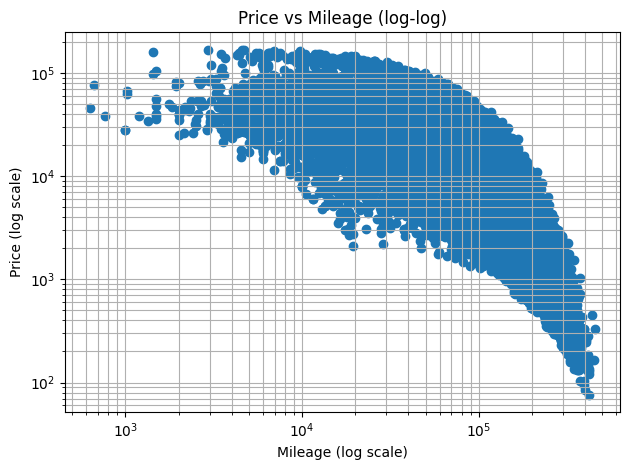

In [9]:
price_col = find_col(["price"])
mileage_col = find_col(["mileage"])

plot_df = df[[mileage_col, price_col]].dropna()
plot_df = plot_df[(plot_df[mileage_col] > 0) & (plot_df[price_col] > 0)]  # log-safe

plt.figure()
plt.scatter(plot_df[mileage_col], plot_df[price_col])  # default style/colors only
plt.xscale("log")
plt.yscale("log")
plt.xlabel(mileage_col + " (log scale)")
plt.ylabel(price_col + " (log scale)")
plt.title(f"{price_col} vs {mileage_col} (log-log)")
plt.grid(True, which="both")
plt.tight_layout()
plt.show()

C:\Users\Georg\AppData\Local\Temp\ipykernel_12732\1005890092.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


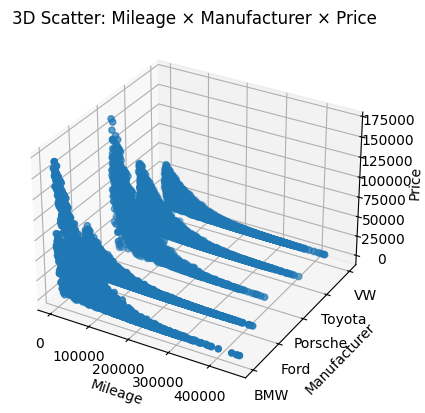

In [18]:
# assumes df and find_col() exist
price_col = find_col(["price"])
mileage_col = find_col(["mileage"])
manufacturer_col = find_col(["manufacturer"])

plot_df = df[[mileage_col, price_col, manufacturer_col]].dropna()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Y axis: manufacturer (handle categorical)
y_vals = plot_df[manufacturer_col]
if not is_numeric_dtype(y_vals):
    cats = pd.Categorical(y_vals)
    y = cats.codes
    ax.set_yticks(range(len(cats.categories)))
    ax.set_yticklabels(cats.categories)
else:
    y = y_vals.values

# Z axis: price (usually numeric)
z = plot_df[price_col].values

# X axis: mileage
x = plot_df[mileage_col].values

ax.scatter(x, y, z)

ax.set_xlabel(mileage_col)
ax.set_ylabel(manufacturer_col)  # now on Y
ax.set_zlabel(price_col)         # now on Z
ax.set_title("3D Scatter: Mileage × Manufacturer × Price")
ax.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Georg\AppData\Local\Temp\ipykernel_12732\3330206874.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


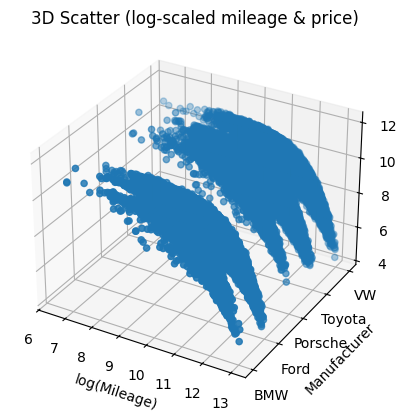

In [21]:
# assumes df and find_col() exist
price_col = find_col(["price"])
mileage_col = find_col(["mileage"])
manufacturer_col = find_col(["manufacturer"])

plot_df = df[[mileage_col, price_col, manufacturer_col]].dropna()

# keep only positive mileage and price for log scaling
mask = (plot_df[mileage_col] > 0) & (plot_df[price_col] > 0)
plot_df = plot_df[mask]

# X: log10(mileage)
x = np.log(plot_df[mileage_col].values)

# Y: manufacturer (handle categorical)
y_vals = plot_df[manufacturer_col]
if not is_numeric_dtype(y_vals):
    cats = pd.Categorical(y_vals)
    y = cats.codes
    y_tick_positions = range(len(cats.categories))
    y_tick_labels = list(cats.categories)
else:
    y = y_vals.values
    y_tick_positions = None
    y_tick_labels = None

# Z: log10(price)
z = np.log(plot_df[price_col].values)

# --- plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

ax.set_xlabel(f"log({mileage_col})")
ax.set_ylabel(manufacturer_col)
ax.set_zlabel(f"log({price_col})")
ax.set_title("3D Scatter (log-scaled mileage & price)")

# apply manufacturer tick labels if categorical
if y_tick_positions is not None:
    ax.set_yticks(y_tick_positions)
    ax.set_yticklabels(y_tick_labels)

ax.grid(True)
plt.tight_layout()
plt.show()